In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
from matplotlib import rc,rcParams
rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
rcParams['font.family'] = "sans-serif"

direc='C:/Users/Bas/Google Drive/Bas Games/'
fig_direc = 'C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Manuscripts/Paper/Figures/'

In [6]:
scored_responses = np.loadtxt(direc + 'Analysis/Google Form/responses_scored.txt',dtype=int)
column_labels = ['Response length','Chess','Checkers','Go','Connect 4','Gomoku','Xiangi','Backgammon','Stratego',
                 'Risk','Board games','Card games','Video games','Puzzles','Competitive game playing','Education']

with open(direc + 'Analysis/Ratings/ratings_hvh_model.txt','r') as f:
    R = np.array([[int(line.split()[1][6:]),int(line.split()[2])]
               for i,line in enumerate(f) if i>0 and line.split()[1].startswith('model')])

ratings = np.mean(R[R[:,0].argsort()][:,1].reshape([40,5]),axis=1)
ratings_by_player = np.array([ratings[i-1] for i in scored_responses[:,0]])


C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


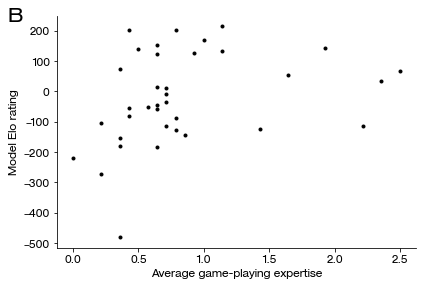

SpearmanrResult(correlation=0.39909883563310022, pvalue=0.01589880343891931)


In [12]:
average_expertise = np.mean(scored_responses[:,2:-1],axis=1)

fig,ax=plt.subplots()
ax.set_ylabel("Model Elo rating")
ax.set_xlabel("Average game-playing expertise")
ax.plot(average_expertise,ratings_by_player,'.k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.95, 'B', horizontalalignment='left',
    verticalalignment='center', transform=fig.transFigure, fontsize = 20)
fig.tight_layout()
fig.savefig(fig_direc + 'google-form-experience_B.pdf')
plt.show()

print(sts.spearmanr(ratings_by_player,average_expertise))

C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


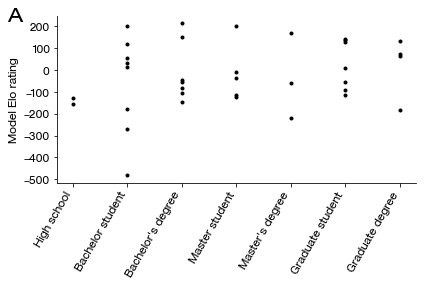

SpearmanrResult(correlation=0.21414679181673119, pvalue=0.20978933415012774)
(0.2372250564675395, 0.163590676582619)


In [13]:
education = scored_responses[:,-1]

fig,ax=plt.subplots()
ax.set_ylabel("Model Elo rating")
ax.set_xticks(range(1,8))
ax.set_xticklabels(['High school','Bachelor student','Bachelor\'s degree','Master student',
                    'Master\'s degree','Graduate student','Graduate degree'],rotation=60,
                   ha='right')

ax.plot(education,ratings_by_player,'.k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.95, 'A', horizontalalignment='left',
    verticalalignment='center', transform=fig.transFigure, fontsize = 20)
fig.tight_layout()
fig.savefig(fig_direc + 'google-form-experience_A.pdf')
plt.show()

print(sts.spearmanr(ratings_by_player,education))
print(sts.pearsonr(ratings_by_player,education))

In [ ]:
sorted(list(zip(column_labels[1:],[sts.spearmanr(ratings_by_player,scored_responses[:,i]) 
                        for i in range(2,16)])),key = lambda x:-x[1].correlation)